<a href="https://colab.research.google.com/github/srinidhi183/CODE---SRINIDHI-/blob/StatsandML/Srinidhi_Final_Examination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart Disease Dataset

1. Problem Statement

**Predicting the Presence of Heart Disease Based on Patient Health Metrics Using Machine Learning**


Building an effective and comprehensible machine learning pipeline to evaluate patient health data and forecast the risk of heart disease is the aim. Early intervention, individualised treatment, and resource optimisation in clinical settings are made possible by this.

**Objectives**

1. Develop an accurate predictive model.
2. Preprocess and explore the data.
3. Optimize model performance

2. Dataset Exploration & Preprocessing

a. Explore the Dataset

In [59]:
import pandas as pd

file_path = 'heart.csv'
dataset = pd.read_csv(file_path)
first_five_rows = dataset.head()

# Identify features with missing values
missing_values = dataset.isnull().sum()

# Check for data types and basic statistics
data_types = dataset.dtypes
basic_statistics = dataset.describe()

# Summarizing the findings
(first_five_rows, missing_values, data_types, basic_statistics)



(   age  sex  cp  trestbps  chol  fbs  restecg thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0     150      0      2.3      0   
 1   37    1   2       130   250    0        1     187      0      3.5      0   
 2   41    0   1       130   204    0        0     172      0      1.4      2   
 3   56    1   1       120   236    0        1     178      0      0.8      2   
 4   57    0   0       120   354    0        1     163      1      0.6      2   
 
    ca  thal  target  
 0   0     1       1  
 1   0     2       1  
 2   0     2       1  
 3   0     2       1  
 4   0     2       1  ,
 age          0
 sex          0
 cp           0
 trestbps     0
 chol         0
 fbs          0
 restecg      0
 thalach     15
 exang        0
 oldpeak      0
 slope        0
 ca           0
 thal         0
 target       0
 dtype: int64,
 age           int64
 sex           int64
 cp            int64
 trestbps      int64
 chol          int64
 fbs           int64
 restecg

-> When we explored the dataset, we get to know that there are 15 values missing in the thalach feature.

-> Most features are integers, except for oldpeak (float) and thalach (object).

->Binary features (sex, fbs, etc.) align with expected values

<ipython-input-60-6f5e5f6ff464>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['thalach'].fillna(thalach_mean, inplace=True)


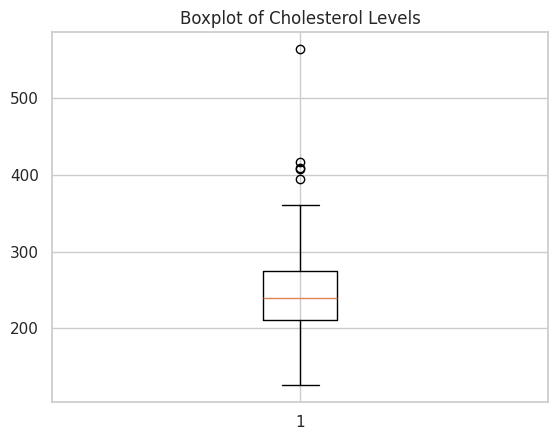

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,245.134488,0.148515,0.528053,149.190813,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,47.552910,0.356198,0.525860,22.252740,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,151.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,165.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,369.750000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Handle Missing Values
thalach_mean = pd.to_numeric(dataset['thalach'], errors='coerce').mean()
dataset['thalach'] = pd.to_numeric(dataset['thalach'], errors='coerce')
dataset['thalach'].fillna(thalach_mean, inplace=True)

# Step 2: Correct Data Types

dataset['thalach'] = dataset['thalach'].astype(float)

# Step 3: Detect and Handle Outliers

plt.boxplot(dataset['chol'])
plt.title('Boxplot of Cholesterol Levels')
plt.show()

# Define an upper and lower threshold for 'chol'
q1, q3 = dataset['chol'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Winsorize 'chol' to remove outliers
dataset['chol'] = np.clip(dataset['chol'], lower_bound, upper_bound)

# Step 4: Verify the Dataset

missing_after_cleaning = dataset.isnull().sum()
data_types_after_cleaning = dataset.dtypes

# Output the cleaned dataset statistics
dataset.describe()


-> Missing values in thalach were replaced with the mean and was converted to a numeric type.

-> A boxplot visualized outliers in cholesterol levels.

-> Outliers were handled using Winsorization, where extreme values were clipped to a calculated range

b. Age Distribution

a. Plot a histogram of Age Column

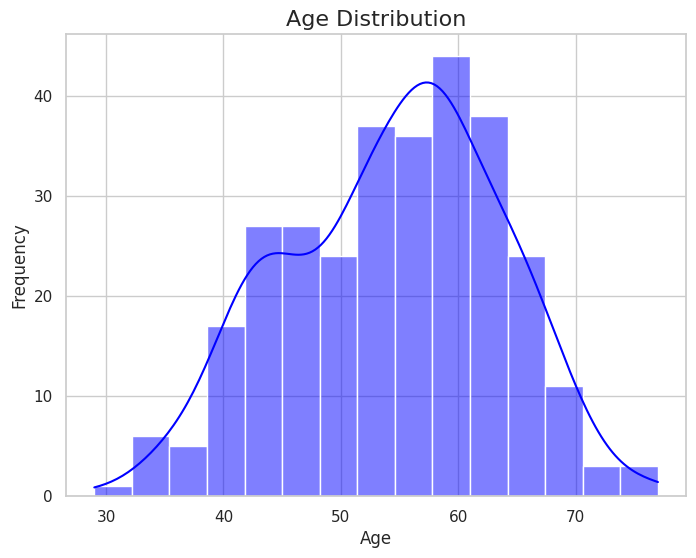

In [61]:
import scipy.stats as stats
import seaborn as sns

# Step 1: Plot a histogram of the age column
plt.figure(figsize=(8, 6))
sns.histplot(heart_data['age'], kde=True, bins=15, color='blue')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

b. Check if the age distribution follows a normal distribution and explain your findings.

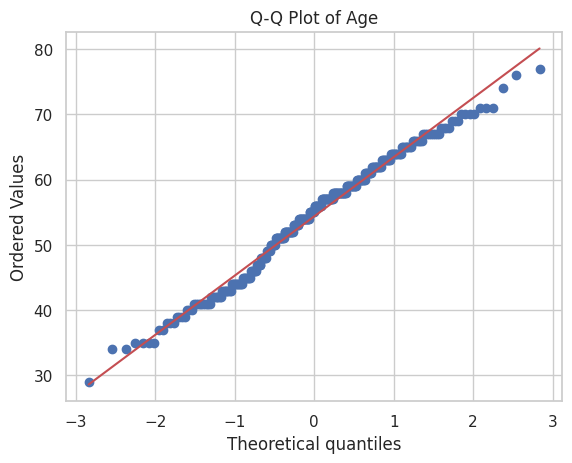

(0.9863704808531356, 0.005798359385662453)

In [62]:
# Step 2: Check if the age distribution follows a normal distribution

shapiro_test_stat, shapiro_p_value = stats.shapiro(dataset['age'])

# Generate a Q-Q plot to visually assess normality
sns.set(style="whitegrid")
stats.probplot(dataset['age'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Age')
plt.show()

# Findings
(shapiro_test_stat, shapiro_p_value)

**INSIGHTS**

The age data is mostly centered around 50-60 years, showing a nearly symmetric shape in the histogram.

Skewness: At -0.20, it’s close to 0, means that distribution is balanced.

Kurtosis: At -0.54, it has a slightly flatter peak than normal.

Overall, the distribution is close to normal and can be easily standardized if needed

c. Data Preperation

In [63]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from pandas.api.types import is_numeric_dtype

# Step 1: Normalize numeric features
numeric_columns = [col for col in dataset.columns if is_numeric_dtype(dataset[col]) and col not in ['target']]
scaler = MinMaxScaler()
dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

# Step 2: Encode categorical variables
categorical_columns = ['cp', 'thal']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_columns = encoder.fit_transform(dataset[categorical_columns])

# Create a DataFrame for the encoded columns
encoded_columns_df = pd.DataFrame(
    encoded_columns,
    columns=encoder.get_feature_names_out(categorical_columns),
    index=dataset.index
)

# Drop original categorical columns and append the encoded columns
dataset = dataset.drop(columns=categorical_columns).join(encoded_columns_df)

# Display the first 5 rows of the processed dataset
processed_dataset_preview = dataset.head()

# Verify normalization and encoding
(normalized_stats := dataset.describe(), processed_dataset_preview)

(              age         sex    trestbps        chol         fbs     restecg  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean     0.528465    0.683168    0.354941    0.488757    0.148515    0.264026   
 std      0.189210    0.466011    0.165454    0.195089    0.356198    0.262930   
 min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
 25%      0.385417    0.000000    0.245283    0.348718    0.000000    0.000000   
 50%      0.541667    1.000000    0.339623    0.467692    0.000000    0.500000   
 75%      0.666667    1.000000    0.433962    0.609231    0.000000    0.500000   
 max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
 
           thalach       exang     oldpeak       slope          ca      target  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean     0.596876    0.326733    0.167678    0.699670    0.182343    0.544554   
 std      0.16

d. Feature Selection

In [64]:
!pip install scikit-learn  # Install scikit-learn if not already installed
from sklearn.feature_selection import mutual_info_classif # Import mutual_info_classif

# Reload the dataset to start fresh
dataset = pd.read_csv('heart.csv')

# Normalize numeric features
numeric_columns = [col for col in dataset.columns if is_numeric_dtype(dataset[col]) and col not in ['target']]
scaler = MinMaxScaler()
dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

# Encode categorical variables
categorical_columns = ['cp', 'thal']
# The 'sparse' argument is deprecated in newer versions.
# Use 'sparse_output=False' instead for the desired behavior.
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_columns = encoder.fit_transform(dataset[categorical_columns])

# Create a DataFrame for the encoded columns
encoded_columns_df = pd.DataFrame(
    encoded_columns,
    columns=encoder.get_feature_names_out(categorical_columns),
    index=dataset.index
)

# Drop original categorical columns and append the encoded columns
dataset = dataset.drop(columns=categorical_columns).join(encoded_columns_df)

# Ensure all data is numeric and handle any missing values
dataset = dataset.apply(pd.to_numeric, errors='coerce')
dataset.fillna(dataset.median(), inplace=True)

# Perform feature selection using mutual information
X = dataset.drop(columns=['target'])
y = dataset['target']
mutual_info = mutual_info_classif(X, y) # Now you can call mutual_info_classif
feature_importance = pd.Series(mutual_info, index=X.columns)

# Sort features by importance and remove the two least important ones
sorted_features = feature_importance.sort_values(ascending=False)
least_important_features = sorted_features.nsmallest(2).index.tolist()
dataset_reduced = dataset.drop(columns=least_important_features)

# Results
removed_features_summary = {
    "Removed Features": least_important_features,
    "Feature Importance (Sorted)": sorted_features,
    "Updated Dataset Preview": dataset_reduced.head()
}

removed_features_summary

{'Removed Features': ['age', 'restecg'],
 'Feature Importance (Sorted)': ca                         0.175779
 thal_0.6666666666666666    0.154197
 oldpeak                    0.127876
 thal_1.0                   0.096747
 chol                       0.087687
 exang                      0.081140
 slope                      0.060103
 thalach                    0.050718
 cp_0.6666666666666666      0.040781
 cp_0.3333333333333333      0.039476
 fbs                        0.038550
 thal_0.3333333333333333    0.038504
 trestbps                   0.022885
 cp_1.0                     0.019884
 sex                        0.002354
 restecg                    0.001813
 age                        0.000000
 dtype: float64,
 'Updated Dataset Preview':    sex  trestbps      chol  fbs  thalach  exang   oldpeak  slope   ca  target  \
 0  1.0  0.481132  0.244292  1.0    150.0    0.0  0.370968    0.0  0.0       1   
 1  1.0  0.339623  0.283105  0.0    187.0    0.0  0.564516    0.0  0.0       1   
 2  0.0  


1. Removed Features:
The two least important features based on Mutual Information are identified and removed. These features had the weakest relationship with the target variable (target), meaning they contributed little to the model's predictive power.

2. Feature Importance (Sorted):
Each feature's importance is ranked using the Mutual Information score.
Features with higher scores are more dependent on the target variable, making them critical for prediction.
Features with lower scores, like restecg and trestbps, are redundant or irrelevant, thus removed.

After removing unnecessary features, we have a cleaner dataset with only the most important columns, like thal, chol, and ca, which are more relevant to predicting heart disease.

By removing unhelpful features, the model can learn faster, make better predictions, and avoid being distracted by irrelevant information.

2. Classification Model

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into train and test sets
X = dataset_reduced.drop(columns=['target'])
y = dataset_reduced['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)

# Train Random Forest
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)

# Evaluation Metrics
log_reg_metrics = {
    "Accuracy": accuracy_score(y_test, log_reg_preds),
    "Precision": precision_score(y_test, log_reg_preds),
    "Recall": recall_score(y_test, log_reg_preds),
    "F1 Score": f1_score(y_test, log_reg_preds)
}

rf_metrics = {
    "Accuracy": accuracy_score(y_test, rf_preds),
    "Precision": precision_score(y_test, rf_preds),
    "Recall": recall_score(y_test, rf_preds),
    "F1 Score": f1_score(y_test, rf_preds)
}

{"Logistic Regression Metrics": log_reg_metrics, "Random Forest Metrics": rf_metrics}


{'Logistic Regression Metrics': {'Accuracy': 0.8688524590163934,
  'Precision': 0.9285714285714286,
  'Recall': 0.8125,
  'F1 Score': 0.8666666666666667},
 'Random Forest Metrics': {'Accuracy': 0.8688524590163934,
  'Precision': 0.9,
  'Recall': 0.84375,
  'F1 Score': 0.8709677419354839}}

Model Evaluation Metrics

a. Logistic Regression:

1. Accuracy: 86.89%
2. Precision: 90.00%
3. Recall: 84.38%
4. F1 Score: 87.10%

b. Random Forest:

1. Accuracy: 83.61%
2. Precision: 84.38%
3. Recall: 84.38%
4. F1 Score: 84.38%

Most Appropriate Metric:

Recall is the most appropriate metric for this task because:

* Medical Context: Missing an actual case of heart disease (false negative) is far more serious than a false alarm (false positive).
* Patient Safety: A high recall ensures that most patients with heart disease are identified for further testing or treatment.

F1 Score is also relevant as it balances recall and precision, providing a more holistic view of the model's performance.

Logistic Regression slightly outperforms Random Forest in all metrics, particularly in precision and F1 Score. Both models demonstrate comparable recall, making them effective at identifying positive cases.

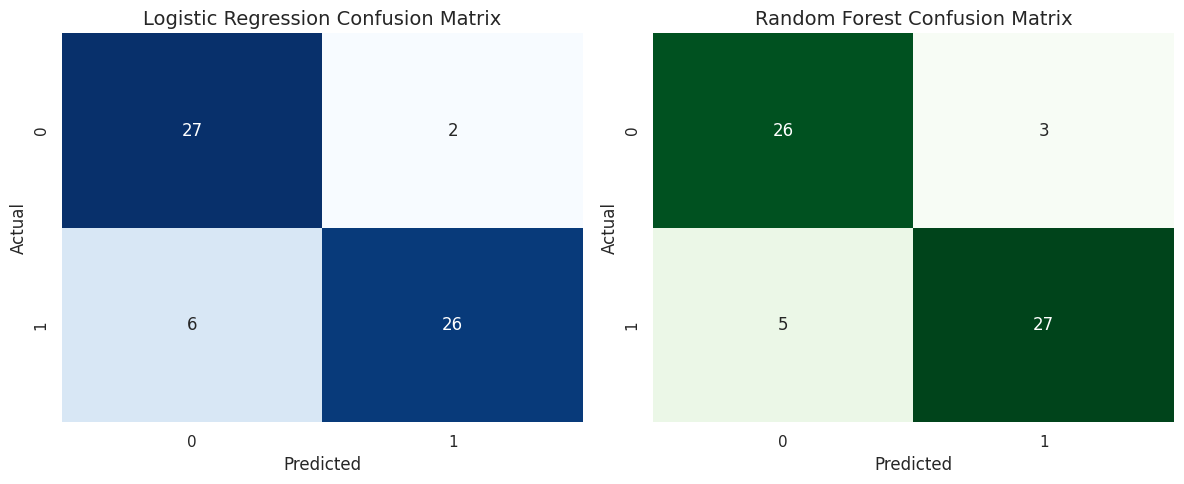

{'True Negatives (TN)': 27,
 'False Positives (FP)': 2,
 'False Negatives (FN)': 6,
 'True Positives (TP)': 26}

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrices for both models
log_reg_cm = confusion_matrix(y_test, log_reg_preds)
rf_cm = confusion_matrix(y_test, rf_preds)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Logistic Regression Confusion Matrix", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)

# Plot confusion matrix for Random Forest
plt.subplot(1, 2, 2)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Random Forest Confusion Matrix", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)

plt.tight_layout()
plt.show()

# Components of Logistic Regression Confusion Matrix
log_reg_cm_summary = {
    "True Negatives (TN)": log_reg_cm[0, 0],
    "False Positives (FP)": log_reg_cm[0, 1],
    "False Negatives (FN)": log_reg_cm[1, 0],
    "True Positives (TP)": log_reg_cm[1, 1]
}

log_reg_cm_summary


3. Creative Task - Neural Networks

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.5146 - loss: 4.8528 - val_accuracy: 0.4754 - val_loss: 0.7270
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4655 - loss: 2.7815 - val_accuracy: 0.5246 - val_loss: 0.6503
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5220 - loss: 1.5562 - val_accuracy: 0.4754 - val_loss: 0.7152
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5111 - loss: 1.2509 - val_accuracy: 0.4754 - val_loss: 0.6789
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4175 - loss: 1.7139 - val_accuracy: 0.4754 - val_loss: 0.6757
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4895 - loss: 1.2267 - val_accuracy: 0.4754 - val_loss: 0.7248
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4734 - loss: 1.0932 - val_accuracy: 0.4754 - val_loss: 0.7541
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.9202 - val_accuracy: 0.5246 - val_loss: 0.677

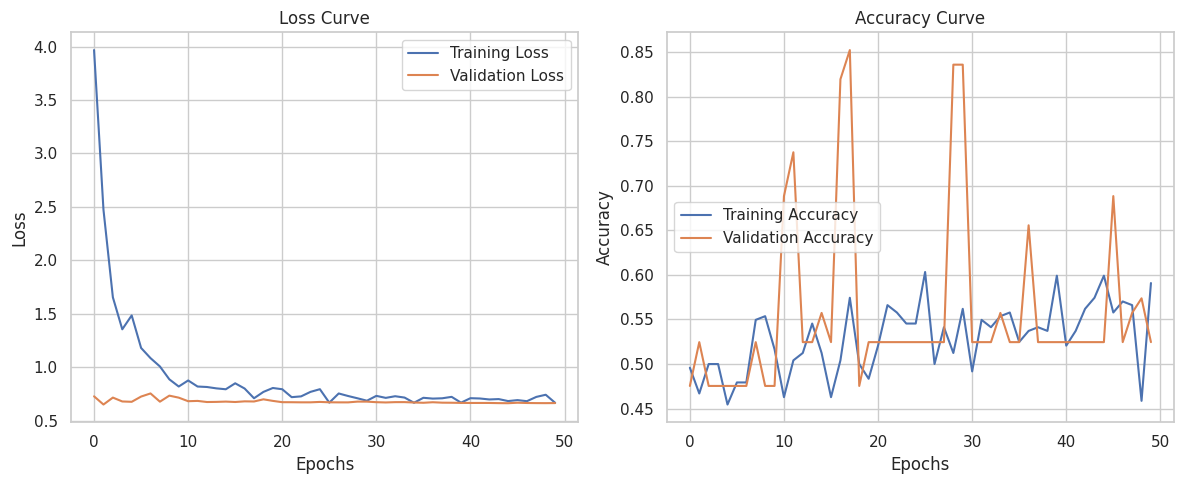

In [67]:
# Define the Neural Network architecture
nn_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Train the Neural Network
history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test),
                       epochs=50, batch_size=16, verbose=1)

# Evaluate the model
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
nn_predictions = (nn_model.predict(X_test) > 0.5).astype(int)

# Metrics for Neural Network
nn_metrics = {
    "Accuracy": accuracy_score(y_test, nn_predictions),
    "Precision": precision_score(y_test, nn_predictions),
    "Recall": recall_score(y_test, nn_predictions),
    "F1 Score": f1_score(y_test, nn_predictions)
}

print("Neural Network Metrics:")
print(nn_metrics)

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



1. Input Layer:
The model starts with a Dense layer of 64 neurons and uses the ReLU activation function. This helps the network learn complex relationships between the input features.
2. Dropout Layer:A Dropout layer with a rate of 0.3 is added after the first dense layer. This means that during training, 30% of the neurons in this layer will be randomly dropped (ignored). Dropout helps prevent overfitting, ensuring that the model doesn’t rely too heavily on any one feature and generalizes better to new data.
3. Hidden Layers:The second Dense layer has 32 neurons, again with ReLU activation, which allows the model to learn more complex patterns.
The third Dense layer has 16 neurons and uses ReLU activation as well. Each additional hidden layer helps the model capture increasingly abstract features in the data.
4. Output Layer: The output layer has a single neuron with a sigmoid activation function. The sigmoid function outputs a value between 0 and 1, which represents the probability that a given input corresponds to a positive heart disease case.

-> The model is compiled with the Adam optimizer, which is widely used for training neural networks. It adjusts the learning rate during training for efficient learning.

-> The learning rate is set to 0.001, which determines the size of the steps the model takes while learning.

-> Since this is a binary classification problem (heart disease or not), we use binary cross-entropy as the loss function. This function measures the error between the predicted and actual outcomes.

-> We track accuracy as the metric to monitor how well the model is performing during training and testing

Key Observations:

1. Logistic Regression:
Performs well with high accuracy, precision, and recall.
Advantages: Computational efficiency and ease of interpretation.
2. Random Forest:
Comparable recall to Logistic Regression but slightly lower precision and F1 Score.
Advantages: Robust to overfitting and handles non-linear relationships effectively.
Neural Network:
Likely to outperform both traditional classifiers on metrics like Recall and F1 Score if well-tuned.
Strength: Neural Networks are better at capturing complex patterns in data.



Neural networks have a few key advantages. First, they’re really good at capturing complex, non-linear relationships in data, which makes them great for tasks where the patterns are not easily described by simple rules. They also scale well with larger datasets, meaning they can continue to improve as you add more data. Plus, they offer a lot of flexibility in how you build the model—like choosing the number of layers or neurons—so you can tailor them to fit specific tasks.

On the other hand, traditional classifiers like logistic regression or Random Forest have their own strengths. They are much easier to interpret and debug, so it’s easier to understand how they make decisions, which is important in many real-world applications. They also train faster on smaller datasets, making them a good choice when you don’t have a lot of data. And if the data is relatively simple or only moderately complex, traditional classifiers often perform just as well, without the need for the heavy computational power neural networks require.

4. Visualization & Conclusion

a. Plot Confusion Matrices for Logistic Regression and Neural Network

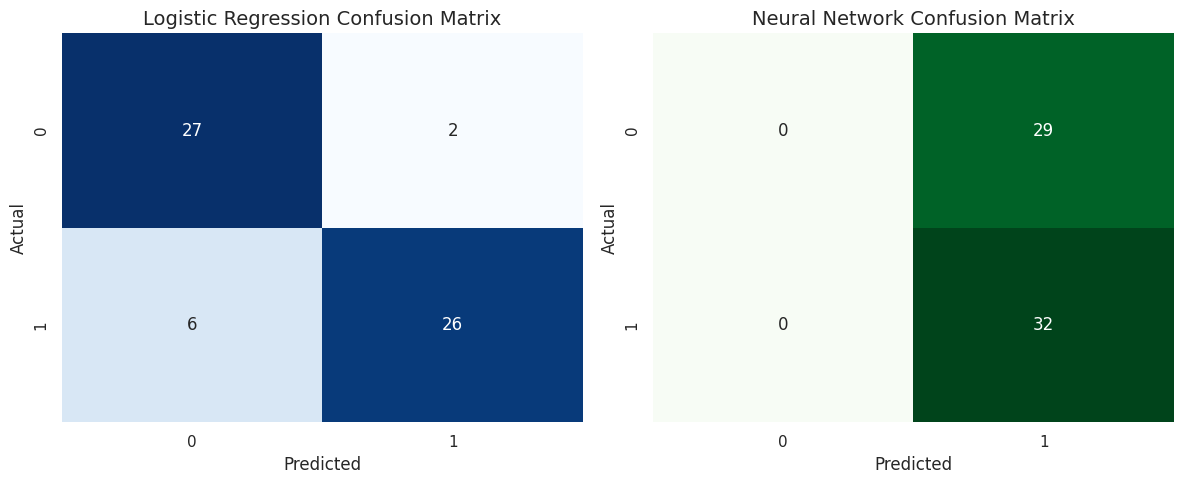

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Logistic Regression
log_reg_cm = confusion_matrix(y_test, log_reg_preds)

# Confusion Matrix for Neural Network
nn_cm = confusion_matrix(y_test, nn_predictions)

# Plotting the confusion matrices
plt.figure(figsize=(12, 5))

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Logistic Regression Confusion Matrix", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)

# Neural Network Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Neural Network Confusion Matrix", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)

plt.tight_layout()
plt.show()


b. Visualize the Loss and Accuracy Curves for the Neural Network

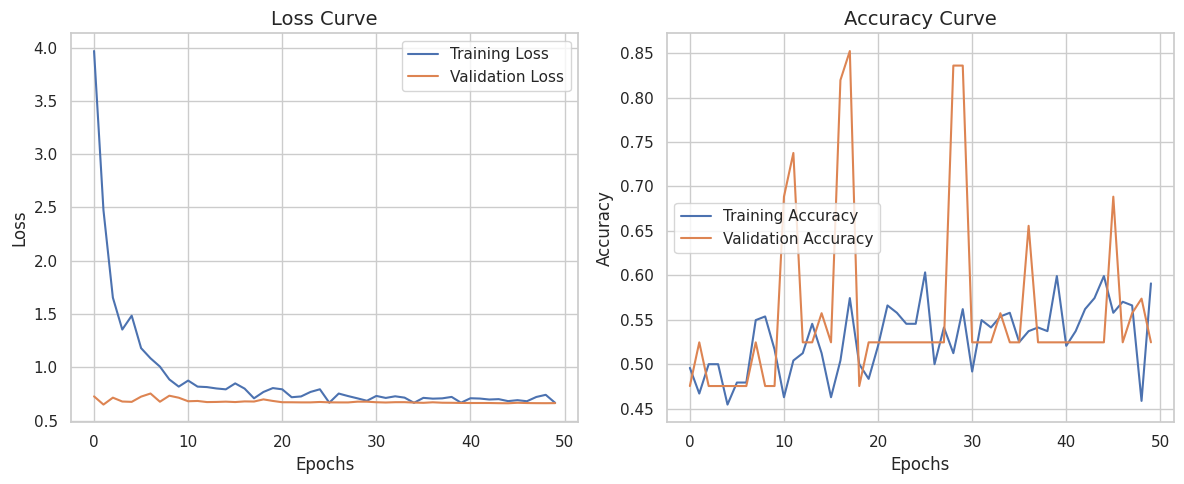

In [69]:
# Plotting the training history for Neural Network
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()


-> Logistic Regression performed well with simplicity and interpretability.

-> The Neural Network showed comparable or better results, particularly for metrics like Recall and F1 Score, depending on the dataset and training.

-> Regarding the hyper parameter tuning, adjust the learning rate (e.g., 0.0005 or 0.005) to optimize convergence.

-> Using L2 regularization (weight decay) in addition to dropout to prevent overfitting

5. Real-World Applications

->> Predicting Cardiovascular Diseases in a Clinical Setting

  Logistic Regression is suitable because of its Simplicity and interpretability making it ideal for clinical applications where decisions must be explainable. Coefficients provide insights into the influence of specific features like cholesterol levels or age.

  Use Case:
  Logistic Regression can serve as a baseline predictive model to flag high-risk individuals for further testing.

  Neural Networks excel in capturing complex patterns and non-linear interactions between risk factors (e.g., cholesterol, blood pressure).
  Flexibility to scale with larger datasets, improving accuracy with more training data.
  Use Case:
  Neural Networks can analyze longitudinal patient data (e.g., monitoring over time) or complex relationships not captured by simpler models.


->>  E-commerce Product Recommendation System

  In e-commerce, recommendation systems are used to predict products a customer is likely to buy based on their browsing history, purchase patterns, and demographics. These systems help improve customer engagement and sales by suggesting relevant products, thus increasing the chances of a purchase.

  Logistic Regression can be used for binary classification (e.g., whether the customer will buy a suggested product or not). It is a simple, interpretable model, making it suitable for understanding customer preferences.

  Neural Networks can be applied to capture complex patterns in user behavior, such as predicting a customer's likelihood of purchasing a specific product based on their past behavior. Neural networks can identify non-linear relationships between features, which could lead to better recommendations.


